## Dragon Real Estate - Price Prediction

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

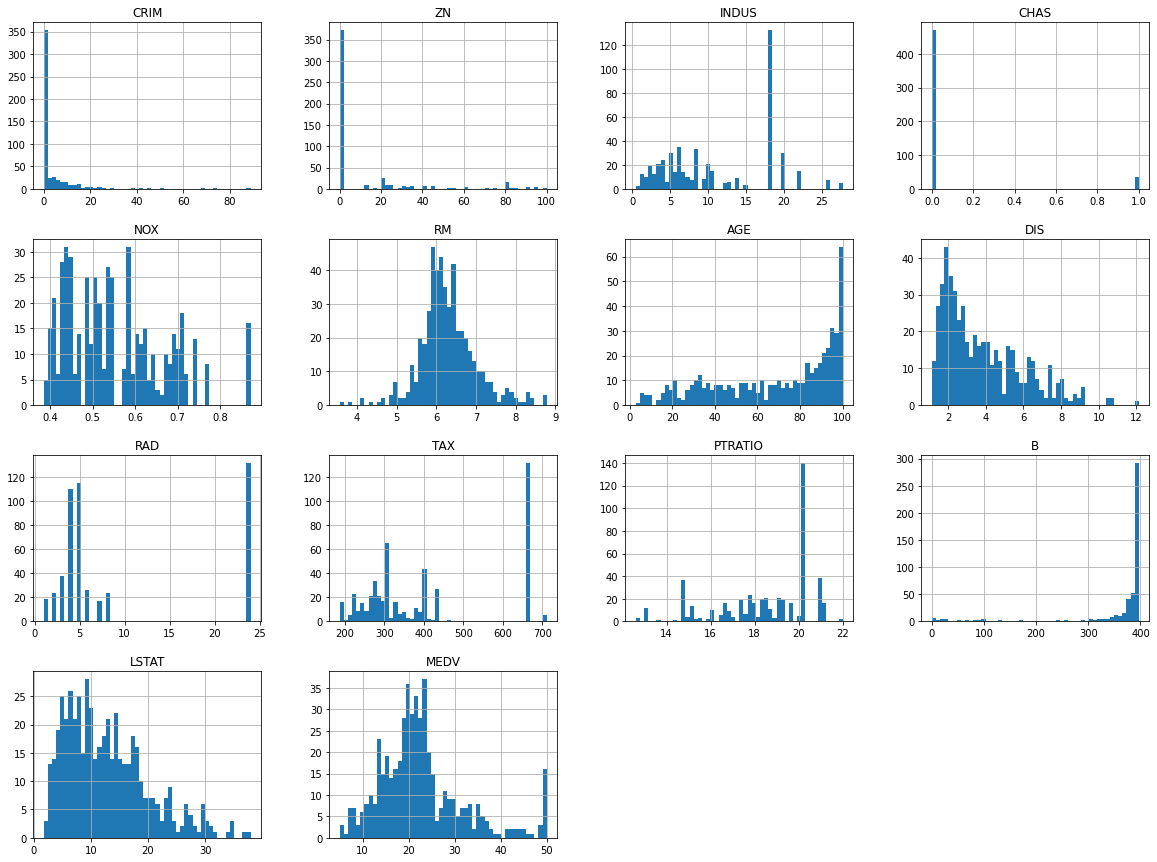

In [9]:
housing.hist(bins=50,figsize=(20,15))

## Train-Test Splitting 

In [10]:
# for learning purpose
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
    

In [11]:
train_set,test_set= split_train_test(housing, 0.2)

In [12]:
print(f"rows in train set:{len(train_set)}\nrows in test set:{len(test_set)}\n")

rows in train set:404
rows in test set:101



In [13]:
# by using sklearn
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"rows in train set:{len(train_set)}\nrows in test set:{len(test_set)}\n")

rows in train set:404
rows in test set:101



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index , test_index in split.split(housing,housing['CHAS']):
    strat_train_set= housing.loc[train_index]
    strat_test_set= housing.loc[test_index]

In [15]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
176,0.05425,0.0,4.05,0,0.510,6.315,73.4,3.3175,5,296,16.6,395.60,6.29,24.6
284,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0
223,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
87,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
261,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05302,0.0,3.41,0,0.489,7.079,63.1,3.4145,2,270,17.8,396.06,5.70,28.7
466,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666,20.2,331.29,21.32,19.1
52,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43,23.4
504,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [16]:
strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
94/7

13.428571428571429

In [19]:
376/28

13.428571428571429

In [20]:
housing = strat_train_set.copy()

## LOOKING FOR CORRELATION

In [21]:
corr_matrix= housing.corr()

In [22]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.660761
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
LSTAT     -0.739129
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

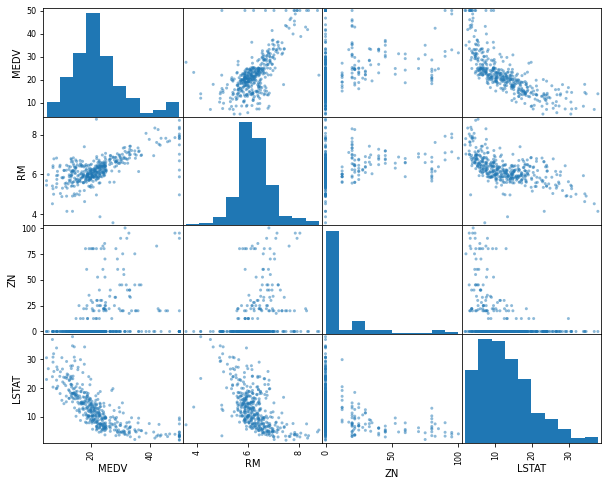

In [23]:
from pandas.plotting import scatter_matrix
attributes= ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize= (10,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

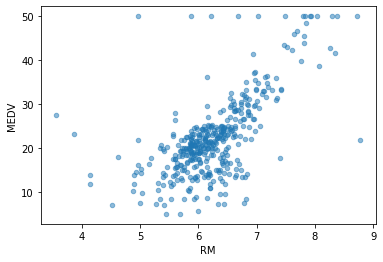

In [24]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.5)

## Trying out Attribute Combinations

In [25]:
housing ["TAXRM"]= housing['TAX']/housing['RM']

In [26]:
housing["TAXRM"]

254     53.607897
348     48.277850
476    125.565611
321     47.508691
326     47.180667
          ...    
154     65.507152
423    119.676550
98      37.216828
455    111.445783
215     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [27]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667


In [28]:
corr_matrix= housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.660761
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
TAXRM     -0.506534
LSTAT     -0.739129
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

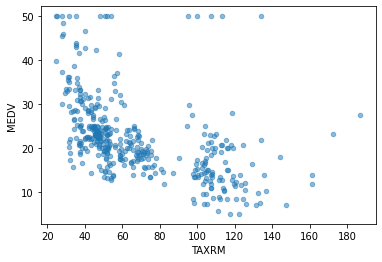

In [29]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.5)

In [30]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## For Dealing With Missing Data

In [31]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1790e+00, 7.7500e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [33]:
# filling missing values by median
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.251631,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.688800,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.179000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Creating A Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([  ('imputer',SimpleImputer(strategy="median")),
                        ('std_scaler', StandardScaler()),

])

In [35]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr

array([[-0.44241248,  3.18716752, -1.12581552, ..., -0.99428207,
         0.43852974, -0.49833679],
       [-0.44320015,  1.36098896, -1.47680838, ...,  0.56613801,
         0.38242047, -0.96561983],
       [ 1.3766227 , -0.46518961,  0.99776471, ...,  0.80256529,
        -0.04255723,  1.67953595],
       ...,
       [-0.43839281, -0.46518961, -1.23595972, ..., -0.23771476,
         0.4566363 , -0.92389813],
       [ 0.11992217, -0.46518961,  0.99776471, ...,  0.80256529,
        -3.61123302,  0.85900919],
       [-0.44118424, -0.46518961,  0.37948858, ..., -0.99428207,
         0.41347532,  0.09411135]])

## Selecting a Desired Model For The Company

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [37]:
some_data = housing.iloc[:5]

In [38]:
some_labels = housing_labels.iloc[:5]

In [39]:
prepared_data = my_pipeline.transform(some_data)

In [40]:
model.predict(prepared_data)

array([20.574, 27.608, 12.29 , 20.932, 22.176])

In [52]:
prepared_data[0]

array([-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.54601796, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679])

In [41]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

In [42]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [43]:
rmse

1.1708775523402344

In [44]:
mse # due to overfit data

1.3709542425742582

## Cross Validation

In [45]:
from sklearn.model_selection import  cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [46]:
rmse_scores

array([3.21905041, 2.5262986 , 5.04862937, 2.69106264, 2.74522001,
       2.52111473, 2.79560393, 3.00462846, 2.05574846, 4.36187819])

In [47]:
def print_scores(scores):
    print("scores :" ,scores)
    print("mean :", scores.mean())
    print("standard deviation:", scores.std())

In [48]:
print_scores(rmse_scores)

scores : [3.21905041 2.5262986  5.04862937 2.69106264 2.74522001 2.52111473
 2.79560393 3.00462846 2.05574846 4.36187819]
mean : 3.096923480250687
standard deviation: 0.8690871865922318


## Saving The Model

In [49]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## Testing The Model On Test Data

In [50]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [51]:
final_rmse

3.4035228793265078

## Model Usage

In [55]:
from joblib import dump,load
import numpy as np
dump(model,'Dragon.joblib')
features = np.array([[-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.54601796, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679]])
model.predict(features)

array([20.508])